In [1]:
import nilearn
import numpy as np
import pandas as pd
from nilearn import plotting
from nilearn import image
from nilearn.glm.first_level import make_first_level_design_matrix
from nilearn.plotting import plot_stat_map, plot_anat, plot_img, view_img
from nilearn.glm.first_level import FirstLevelModel
from nilearn.image import concat_imgs, mean_img
from nilearn.plotting import plot_contrast_matrix
import matplotlib.pyplot as plt
from nilearn.glm import threshold_stats_img
from numpy import array

# General Code for a Single Run

In [2]:
view_file = "C:\\Users\\Hinge\\sub-06\\ses-01\\sub-06_ses-01_func_sub-06_ses-01_task-view_run-03_events.tsv"#"/Users/bradpowell/Desktop/sub-01/Events/view_1.tsv"
events_view = pd.read_csv(view_file, sep='\t')

In [3]:
events_view['trial_type'] = 'view'

In [4]:
recall_file = "C:\\Users\\Hinge\\sub-06\\ses-01\\sub-06_ses-01_func_sub-06_ses-01_task-recall_run-03_events.tsv"#"/Users/bradpowell/Desktop/sub-01/Events/recall_1.tsv"
events_recall = pd.read_csv(recall_file, sep='\t')

In [5]:
events_recall['trial_type'] = 'recall'

In [6]:
events = pd.concat([events_view, events_recall])

In [7]:
events

,onset,duration,trial_type
0,5,412,view
1,442,345,view
2,807,376,view
0,4,290,recall
1,295,90,recall
2,385,276,recall


In [8]:
confounds_file = "C:\\Users\\Hinge\\sub-06\\ses-01\\sub-06_ses-01_task-view_run-03_confounds_selected.txt"#"/Users/bradpowell/Desktop/sub-01/Functional/confounds_1.txt"
confounds = pd.read_csv(confounds_file, sep='\t')

In [9]:
confounds

,trans_x,trans_y,trans_z,rot_x,rot_y,rot_z,framewise_displacement,a_comp_cor_00,a_comp_cor_01,a_comp_cor_02,a_comp_cor_03,a_comp_cor_04,a_comp_cor_05
0,0.029222,0.022356,0.035817,0.000000,0.000111,0.000000,0.049240,-0.006102,-0.010933,-0.033789,-0.016379,0.008828,-0.036331
1,0.027423,0.035402,0.042308,-0.000168,0.000173,0.000316,0.048642,-0.001910,-0.013438,-0.021744,-0.038133,0.021147,-0.005314
2,0.028710,0.080589,0.037445,-0.000705,-0.000223,-0.000136,0.120620,-0.000368,-0.015053,-0.022371,-0.009385,0.033029,0.040661
3,0.087141,0.101006,0.088645,-0.000495,-0.000476,0.000543,0.187170,-0.005601,-0.015465,-0.009333,0.011142,-0.010579,0.020308
4,0.120994,0.020354,0.036545,0.000491,-0.000156,0.000882,0.248833,0.015329,-0.012015,-0.015258,0.033331,0.001741,-0.009204
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,-0.383736,0.372998,0.980188,0.007140,0.013537,-0.001906,0.391732,-0.009442,0.019951,0.005380,-0.023673,-0.040986,0.008399
1192,-0.326498,0.150479,1.055910,0.006653,0.010700,-0.001250,0.554514,0.003007,0.008724,-0.058021,0.029417,-0.095981,-0.046758
1193,-0.185901,-0.046307,1.223740,0.003686,0.012134,-0.003178,0.821656,0.025997,-0.038264,0.066556,0.151922,0.034921,0.121089
1194,-0.057143,0.150394,0.530822,0.000831,0.010913,-0.004793,1.302912,0.035639,-0.112289,0.144923,0.117405,-0.028569,0.088581


In [10]:
timings = np.arange(0, len(confounds))
design_matrix_constant = make_first_level_design_matrix(timings, events, drift_model=None)

In [11]:
design_matrix = pd.concat([design_matrix_constant, confounds], axis=1)

In [12]:
design_matrix

,recall,view,constant,trans_x,trans_y,trans_z,rot_x,rot_y,rot_z,framewise_displacement,a_comp_cor_00,a_comp_cor_01,a_comp_cor_02,a_comp_cor_03,a_comp_cor_04,a_comp_cor_05
0,0.0,0.000000,1.0,0.029222,0.022356,0.035817,0.000000,0.000111,0.000000,0.049240,-0.006102,-0.010933,-0.033789,-0.016379,0.008828,-0.036331
1,0.0,0.000000,1.0,0.027423,0.035402,0.042308,-0.000168,0.000173,0.000316,0.048642,-0.001910,-0.013438,-0.021744,-0.038133,0.021147,-0.005314
2,0.0,0.000000,1.0,0.028710,0.080589,0.037445,-0.000705,-0.000223,-0.000136,0.120620,-0.000368,-0.015053,-0.022371,-0.009385,0.033029,0.040661
3,0.0,0.000000,1.0,0.087141,0.101006,0.088645,-0.000495,-0.000476,0.000543,0.187170,-0.005601,-0.015465,-0.009333,0.011142,-0.010579,0.020308
4,0.0,0.000000,1.0,0.120994,0.020354,0.036545,0.000491,-0.000156,0.000882,0.248833,0.015329,-0.012015,-0.015258,0.033331,0.001741,-0.009204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,0.0,-0.202437,1.0,-0.383736,0.372998,0.980188,0.007140,0.013537,-0.001906,0.391732,-0.009442,0.019951,0.005380,-0.023673,-0.040986,0.008399
1192,0.0,-0.276416,1.0,-0.326498,0.150479,1.055910,0.006653,0.010700,-0.001250,0.554514,0.003007,0.008724,-0.058021,0.029417,-0.095981,-0.046758
1193,0.0,-0.292039,1.0,-0.185901,-0.046307,1.223740,0.003686,0.012134,-0.003178,0.821656,0.025997,-0.038264,0.066556,0.151922,0.034921,0.121089
1194,0.0,-0.269104,1.0,-0.057143,0.150394,0.530822,0.000831,0.010913,-0.004793,1.302912,0.035639,-0.112289,0.144923,0.117405,-0.028569,0.088581


In [13]:
view_array = np.zeros(len(design_matrix.columns))
view_array[1] = 1
view_array

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [14]:
recall_array = np.zeros(len(design_matrix.columns))
recall_array[0] = 1
recall_array

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [15]:
conditions = {
    'view': view_array,
    'recall': recall_array,
}

In [16]:
view_minus_recall = conditions['view'] - conditions['recall']

<AxesSubplot:label='conditions'>

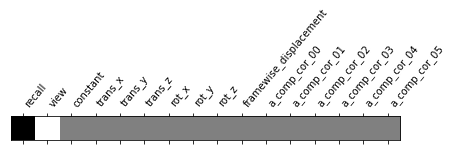

In [17]:
plot_contrast_matrix(view_minus_recall, design_matrix=design_matrix)

In [18]:
image_file = "C:\\Users\\Hinge\\sub-06\\ses-01\\sub-06_ses-01_task-view_run-03_space-MNI152NLin2009cAsym_desc-preproc_bold_trim3_smooth5.nii.gz"#"/Users/bradpowell/Desktop/sub-01/Functional/run_1.nii.gz"
fmri_imgs = image.load_img(image_file)
avg_img = mean_img(fmri_imgs)

In [19]:
fmri_glm = FirstLevelModel(t_r=1,
                           noise_model='ar1',
                           standardize=False,
                           hrf_model='spm',
                           drift_model=None,
                           high_pass=.01,
                          n_jobs = -2)

In [20]:
fmri_glm = fmri_glm.fit(fmri_imgs, design_matrices = design_matrix)

In [21]:
beta_map = fmri_glm.compute_contrast(view_minus_recall,
                                  output_type='all')

In [22]:
beta_map

{'z_score': <nibabel.nifti1.Nifti1Image at 0x1ffec286e20>,
 'stat': <nibabel.nifti1.Nifti1Image at 0x1ffec2c7ee0>,
 'p_value': <nibabel.nifti1.Nifti1Image at 0x200b31dc760>,
 'effect_size': <nibabel.nifti1.Nifti1Image at 0x200b31dce20>,
 'effect_variance': <nibabel.nifti1.Nifti1Image at 0x200b31dcfd0>}

In [23]:
beta_map['z_score'].to_filename('sub-06_run-03_z_score')

In [24]:
beta_map['stat'].to_filename('sub-06_run-03_stat')

In [25]:
beta_map['p_value'].to_filename('sub-06_run-03_p_value')

In [26]:
beta_map['effect_size'].to_filename('sub-06_run-03_effect_size')

In [27]:
beta_map['effect_variance'].to_filename('sub-06_run-03_effect_variance')